Ecuación ajustada: Y = 0.00300 * t + 0.08350
k: 11.97605
kd: 0.00025


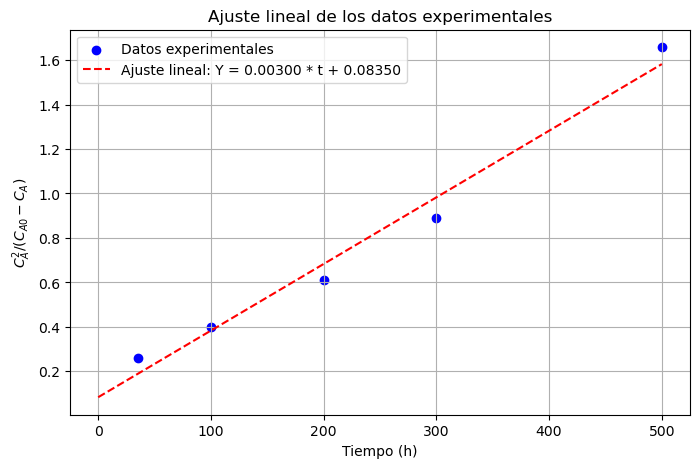

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
t_h = np.array([0, 35, 100, 200, 300, 500])  # Tiempo en horas
RON = np.array([106, 102, 99.7, 98, 96, 94])  # Research Octane Number

# Definimos C_A0 como el valor inicial de RON
C_A0 = RON[0]

# Excluir el primer punto para evitar la división por cero
t_h_valid = t_h[1:]  # Excluye el primer punto
C_A_valid = RON[1:]  # Excluye el primer punto

# Calculamos X(t)
X_t = (C_A0 - C_A_valid) / C_A0

# Calculamos C_A^2 / (C_A0 - C_A)
Y_values = np.sort(((C_A_valid ** 2) / (C_A0 - C_A_valid))/1335) - 0.29049

# Ajuste lineal de la ecuación: Y = m*t + b
def linear_func(t, m, b):
    return m * t + b

params, _ = curve_fit(linear_func, t_h_valid, Y_values)
m_fit, b_fit = params

k = 1/b_fit 
kd = m_fit/k

# Generamos datos para la recta ajustada
t_fit = np.linspace(0, 500, 100)
Y_fit = linear_func(t_fit, m_fit, b_fit)

# Mostrar resultados
print(f"Ecuación ajustada: Y = {m_fit:.5f} * t + {b_fit:.5f}")
print(f"k: {k:.5f}")
print(f"kd: {kd:.5f}")

# Graficamos los resultados
plt.figure(figsize=(8, 5))
plt.scatter(t_h_valid, Y_values, color='blue', label='Datos experimentales')
plt.plot(t_fit, Y_fit, color='red', linestyle='--', label=f'Ajuste lineal: Y = {m_fit:.5f} * t + {b_fit:.5f}')
plt.xlabel('Tiempo (h)')
plt.ylabel(r'$C_A^2 / (C_{A0} - C_A)$')
plt.title('Ajuste lineal de los datos experimentales')
plt.legend()
plt.grid(True)
plt.show()


